In [1]:
%matplotlib inline
import pandas as pd

In [2]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [3]:
release_dates = pd.read_csv('data/release_dates.csv',
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [4]:
Christmas_USA = release_dates[(release_dates.title.str.contains('Christmas')) &
                              (release_dates.country == 'USA')].reset_index(drop=True)

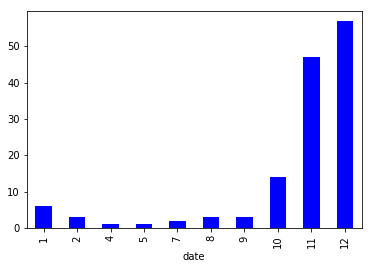

In [5]:
Christmas_USA.groupby(Christmas_USA['date'].dt.month).size().plot(kind='bar', color='blue')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

In [6]:
hobbit = release_dates[(release_dates.title.str.startswith('The Hobbit')) &
                       (release_dates.country=='USA')].reset_index(drop=True)

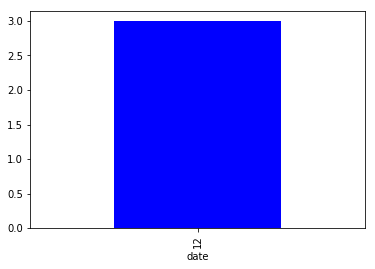

In [7]:
hobbit.groupby(hobbit['date'].dt.month).size().plot(kind='bar', color='blue')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

In [8]:
romance = release_dates[(release_dates.title.str.contains('Romance')) &
                        (release_dates.country=='USA')]

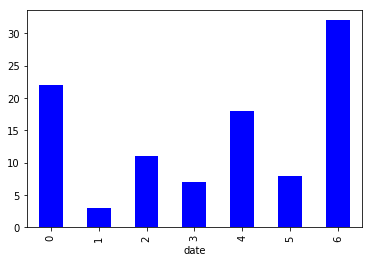

In [9]:
romance.groupby(romance['date'].dt.dayofweek).size().plot(kind='bar', color='blue')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

In [10]:
action = release_dates[(release_dates.title.str.contains('Action')) &
                       (release_dates.country=='USA')]

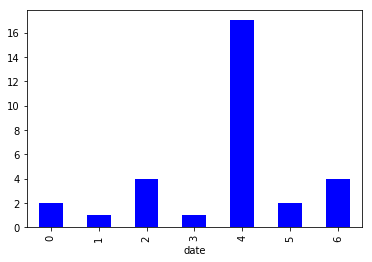

In [11]:
action.groupby(action['date'].dt.dayofweek).size().plot(kind='bar', color='blue')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [12]:
release_cast = release_dates.merge(cast, on=['title', 'year'])

In [13]:
release_cast[(release_cast.name == 'Judi Dench') &
             (release_cast.country == 'USA') &
             (release_cast.year // 10 == 199)]

,title,year,country,date,name,type,character,n
5746738,GoldenEye,1995,USA,1995-11-17,Judi Dench,actress,M,6.0
6052860,Hamlet,1996,USA,1996-12-25,Judi Dench,actress,Hecuba,12.0
7325983,Jack & Sarah,1995,USA,1996-03-22,Judi Dench,actress,Margaret,3.0
9999317,Mrs Brown,1997,USA,1997-10-03,Judi Dench,actress,Queen Victoria,1.0
12784084,Shakespeare in Love,1998,USA,1999-01-08,Judi Dench,actress,Queen Elizabeth,12.0
14156471,Tea with Mussolini,1999,USA,1999-05-14,Judi Dench,actress,Arabella,2.0
17712177,The World Is Not Enough,1999,USA,1999-11-19,Judi Dench,actress,M,6.0
18010435,Tomorrow Never Dies,1997,USA,1997-12-19,Judi Dench,actress,M,9.0


### In which months do films with Judi Dench tend to be released in the USA?

In [14]:
judi_dench = release_cast[(release_cast.name == 'Judi Dench') &
             (release_cast.country == 'USA')]

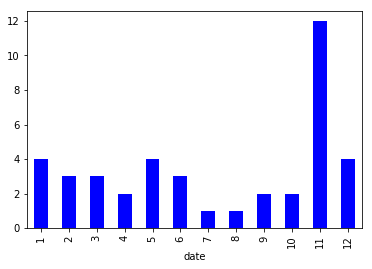

In [15]:
judi_dench.groupby(judi_dench.date.dt.month).size().plot(kind='bar', color='blue')

### In which months do films with Tom Cruise tend to be released in the USA?

In [16]:
tom_cruise = release_cast[(release_cast.name == 'Tom Cruise') &
                          (release_cast.country == 'USA')]

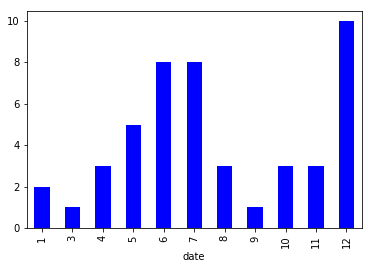

In [17]:
tom_cruise.groupby(tom_cruise.date.dt.month).size().plot(kind='bar', color='blue')